# Analysis of algorithmic, hedge, and mutual fund portfolios compared to the S&P 500
----------------------------------------------------------------------------------------------------------------------------------------------------

In [2057]:
# Import necessary libraries
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning
----------------------------------------------------------------------------------------------------------------------------------------------
The csv files for the different portfolios will be read into DataFrames and the data will be cleaned.
Files:
    1. whale_returns_csv
    2. algo_returns.csv
    3. sp500_history.csv


## Whale Returns
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Read Whale returns csv and clean the data

In [2058]:
# Setting filepaths
whale_file_path = Path('../../Desktop/RU-HOU-FIN-PT-07-2019-U-C/hw/03-Python_and_Pandas/Instructions/Resources/whale_returns.csv')
algo_file_path = Path('../../Desktop/RU-HOU-FIN-PT-07-2019-U-C/hw/03-Python_and_Pandas/Instructions/Resources/algo_returns.csv')
sp500_file_path = Path('../../Desktop/RU-HOU-FIN-PT-07-2019-U-C/hw/03-Python_and_Pandas/Instructions/Resources/sp500_history.csv')


In [2059]:
# Reading whale returns
whale_returns_csv = pd.read_csv(whale_file_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
whale_returns_csv.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [2060]:
# Checking the index's data type
whale_returns_csv.index.dtype

dtype('<M8[ns]')

In [2061]:
# Taking a sample of the data
whale_returns_csv.sample(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-07-22,-0.002053,-0.001338,0.001271,0.001726
2017-04-25,0.005335,-0.000904,-0.000303,0.007220
2017-02-22,-0.005889,-0.004094,-0.012095,0.003114
2017-05-10,0.005238,0.000090,0.001549,0.009197
2018-04-17,0.006933,0.004547,0.005965,0.019044
2018-06-19,-0.003463,0.001864,0.009821,-0.005693
2017-05-23,0.002063,0.002757,0.006580,-0.005713
2018-02-26,0.003984,0.006145,0.009546,-0.001412
2019-01-16,0.004426,0.000646,0.005657,0.004354


In [2062]:
# Checking tail of data
whale_returns_csv.tail()

C:\Users\willi\Anaconda3\lib\site-packages\IPython\core\displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [2063]:
# Inspecting data furthur
whale_returns_csv.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [2064]:
# Checking the columns data types
whale_returns_csv.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [2065]:
# Checking each columns row count
whale_returns_csv.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [2066]:
# Finding percentage of null values
whale_returns_csv.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [2067]:
# Finding number of null values
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [2068]:
# Dropping nulls
whale_returns_csv = whale_returns_csv.dropna()
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [2069]:
# Checking for duplicate dates
whale_returns_csv.index.duplicated().sum()


0

## Algorithmic Daily Returns
---------------------------------------
Read algorithmic csv and clean the data

In [2070]:
# Reading algo data
algo_daily_returns_csv = pd.read_csv(algo_file_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
algo_daily_returns_csv.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [2071]:
# Checking the index's data type
algo_daily_returns_csv.index.dtype

dtype('<M8[ns]')

In [2072]:
# Looking at tail of data
algo_daily_returns_csv.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [2073]:
# Taking a sample of data
algo_daily_returns_csv.sample(10)

,Algo 1,Algo 2
Date,,
2015-06-11,-0.001833,0.002096
2019-04-08,0.003761,0.000218
2015-09-02,0.007289,0.011359
2018-11-07,0.003825,0.014371
2018-02-12,0.014104,0.012201
2015-06-12,0.000493,0.000163
2018-10-16,0.021950,0.018630
2014-11-19,-0.003074,-0.005861
2016-01-11,-0.007627,-0.018451


In [2074]:
# Furthur inspecting data
algo_daily_returns_csv.describe()

,Algo 1,Algo 2
count,1241.000000,1235.000000
mean,0.000667,0.000341
std,0.007972,0.008466
min,-0.030951,-0.036937
25%,-0.003238,-0.003733
50%,0.000135,0.000581
75%,0.003978,0.005194
max,0.098246,0.083734


In [2075]:
# Checking the columns data types
algo_daily_returns_csv.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [2076]:
# Seeing how many rows in each column
algo_daily_returns_csv.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [2077]:
# Checking for percentage null in each column
algo_daily_returns_csv.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [2078]:
# Checking for total number of null values
algo_daily_returns_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [2079]:
# Dropping null values
algo_daily_returns_csv = algo_daily_returns_csv.dropna()

In [2080]:
# Check if nulls were dropped
algo_daily_returns_csv.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [2081]:
# Lookings for duplicate dates
algo_daily_returns_csv.index.duplicated().sum()

0

In [2082]:
# Row count
algo_daily_returns_csv.count()

Algo 1    1235
Algo 2    1235
dtype: int64

## S&P 500 Returns
-------------------------------------------------------
Read S&P 500 csv and clean the data

In [2083]:
# Reading S&P 500 csv
sp500_returns = pd.read_csv(sp500_file_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
sp500_returns.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [2084]:
# Checking the index's data type
sp500_returns.index.dtype

dtype('<M8[ns]')

In [2085]:
# Checking the tail of the data
sp500_returns.tail()

,Close
Date,
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99
2012-10-02,$1445.75
2012-10-01,$1444.49


In [2086]:
# Sorting the index
sp500_returns = sp500_returns.sort_index()

In [2087]:
sp500_returns.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [2088]:
# Getting sample of data 
sp500_returns.sample(10)

,Close
Date,
2013-06-10,$1642.81
2015-05-15,$2122.73
2013-08-22,$1656.96
2016-01-25,$1877.08
2019-03-19,$2832.57
2017-03-02,$2381.92
2017-11-29,$2626.07
2018-04-16,$2677.84
2013-09-19,$1722.34


In [2089]:
# Furthur inspecting data
sp500_returns.describe()

,Close
count,1649
unique,1639
top,$2373.47
freq,2


In [2090]:
# Checking data types
sp500_returns.dtypes

Close    object
dtype: object

In [2091]:
# Dropping dollar sign to convert column to a float
sp500_returns['Close'] = sp500_returns['Close'].str.replace('$', '' )
sp500_returns.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [2092]:
# Converting Close column to a float data type
sp500_returns['Close'] = sp500_returns['Close'].astype('float')
sp500_returns.dtypes

Close    float64
dtype: object

In [2093]:
# Counting rows in dataframe
sp500_returns.count()

Close    1649
dtype: int64

In [2094]:
# Checking for duplicate dates 
sp500_returns.index.duplicated().sum()

0

In [2095]:
# Calculating the daily returns
sp500_returns = sp500_returns.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [2096]:
# Checking for percentage of null values
sp500_returns.isnull().mean() * 100

Close    0.060643
dtype: float64

In [2097]:
# Checking for number of null values
sp500_returns.isnull().sum()

Close    1
dtype: int64

In [2098]:
# Dropping null values
sp500_returns = sp500_returns.dropna()
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [2099]:
# Renaming Close column to S&P 500
sp500_returns = sp500_returns.rename(columns = {'Close':'S&P 500'})
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns
-----------------------------------------------------

In [2100]:
# Concatenating all DataFrames into a single DataFrame
all_returns = pd.concat([whale_returns_csv, algo_daily_returns_csv, sp500_returns], axis = 1 , join = 'inner')
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [2101]:
# Checking tail of data
all_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


In [2102]:
# Checking data type of index
all_returns.index.dtype

dtype('<M8[ns]')

In [2103]:
# Checking for null values
all_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
dtype: int64

In [2104]:
# Checking the columns data types
all_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
S&P 500                        float64
dtype: object

# Portfolio Analysis
-------------------------
In this section, I will calculate and visualize performance and risk metrics for the portfolios.

# Performance
-----------------------------------------
Calculate and plot the daily returns and cumulative returns

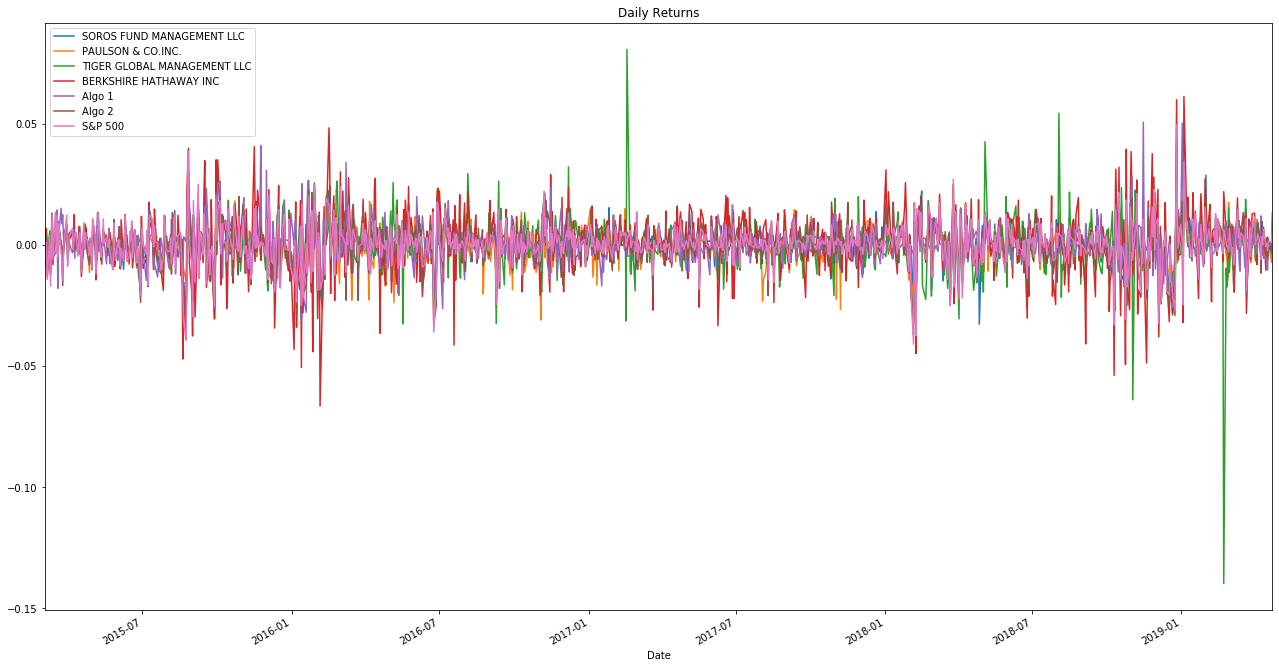

In [2105]:
# Plot daily returns
all_returns.plot(title = 'Daily Returns', legend = True, figsize = (22,12))


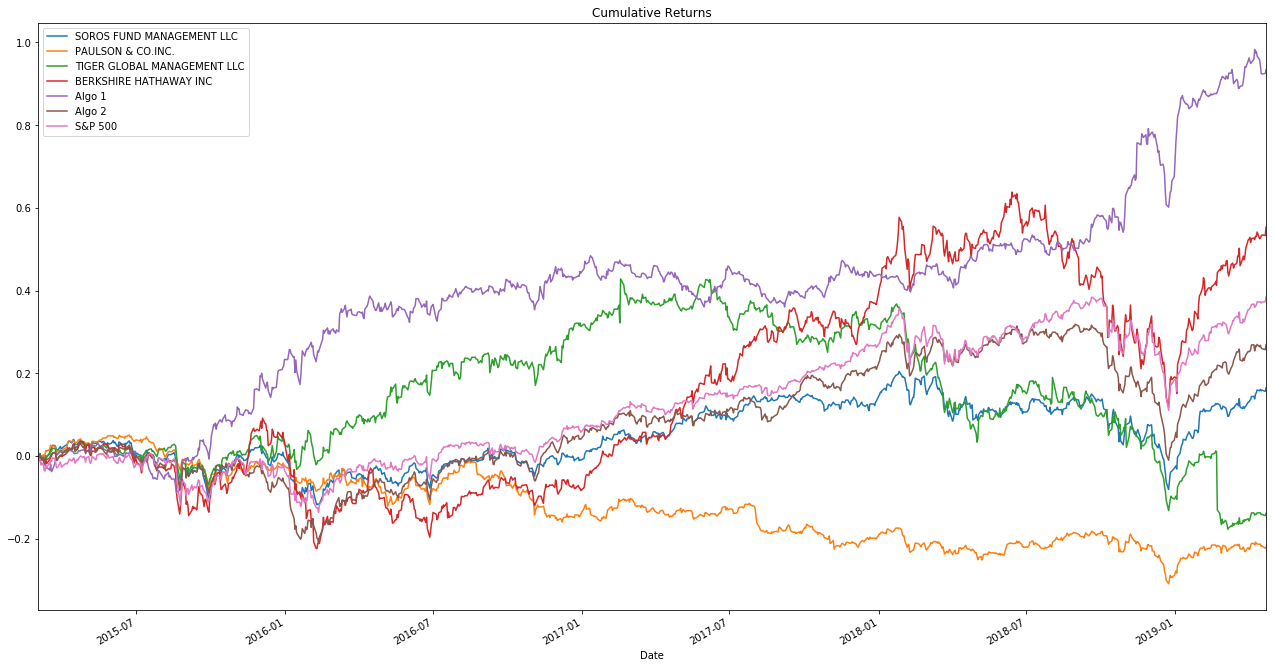

In [2106]:
# Calculate Cumulative returns and plot them
cumulative_returns = (1 + all_returns).cumprod() - 1
cumulative_returns.plot(title = 'Cumulative Returns', legend = True, figsize =(22,12))

## Performance by Month and Year
----------------------------------


In [2107]:
# Calculate cumulative returns on an annual basis 
cumulative_returns_by_year = all_returns.groupby(all_returns.index.year).apply(lambda x: (1+x).cumprod() - 1)
annual_returns = cumulative_returns_by_year.groupby(cumulative_returns_by_year.index.year).last()
annual_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015,-0.003019,-0.023685,0.027644,0.034440,0.233385,-0.065759,-0.034689
2016,-0.006991,-0.119136,0.278194,-0.114539,0.169350,0.113744,0.095350
2017,0.144073,-0.069746,-0.000498,0.491562,-0.003228,0.162514,0.194200
2018,-0.143357,-0.111315,-0.317783,-0.128091,0.165843,-0.141432,-0.062373
2019,0.200247,0.096603,-0.038493,0.304057,0.154337,0.222163,0.170265


In [2108]:
# Best portfolios for 2017
annual_returns.loc[2017].sort_values(ascending = False)

BERKSHIRE HATHAWAY INC         0.491562
S&P 500                        0.194200
Algo 2                         0.162514
SOROS FUND MANAGEMENT LLC      0.144073
TIGER GLOBAL MANAGEMENT LLC   -0.000498
Algo 1                        -0.003228
PAULSON & CO.INC.             -0.069746
Name: 2017, dtype: float64

In [2109]:
# Calculate returns by month
cumulative_returns_by_month = all_returns.groupby(pd.Grouper(freq = 'M')).apply(lambda x: (1+x).cumprod() - 1)
monthly_returns = cumulative_returns_by_month.groupby(pd.Grouper(freq='M')).last()
monthly_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-31,0.017207,0.011306,0.009419,0.002310,0.012788,-0.000962,-0.023378
2015-04-30,0.003248,0.016876,0.010373,0.011927,-0.007167,0.009620,0.008521
2015-05-31,0.008094,0.019797,-0.001410,0.001002,0.009439,0.000920,0.010491
2015-06-30,-0.020352,-0.011427,-0.023138,-0.020195,-0.003230,-0.009999,-0.021012
2015-07-31,-0.014779,-0.018293,0.020172,-0.021668,-0.051560,-0.016582,0.019742


In [2110]:
# Top returns for December 2018
monthly_returns.loc['2018-12-31'].sort_values(ascending = False)

Algo 1                        -0.055161
BERKSHIRE HATHAWAY INC        -0.089757
PAULSON & CO.INC.             -0.091320
S&P 500                       -0.091777
SOROS FUND MANAGEMENT LLC     -0.095657
Algo 2                        -0.119221
TIGER GLOBAL MANAGEMENT LLC   -0.144032
Name: 2018-12-31 00:00:00, dtype: float64

## Risk
----------------------------
Determine risk of each portfolio

In [2111]:
# Daily Standard Deviations
daily_std = all_returns.std().sort_values()
daily_std.head(10)

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [2112]:
# These portfolios are riskier than the S&P 500
daily_std > daily_std[4]

PAULSON & CO.INC.              False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
S&P 500                        False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

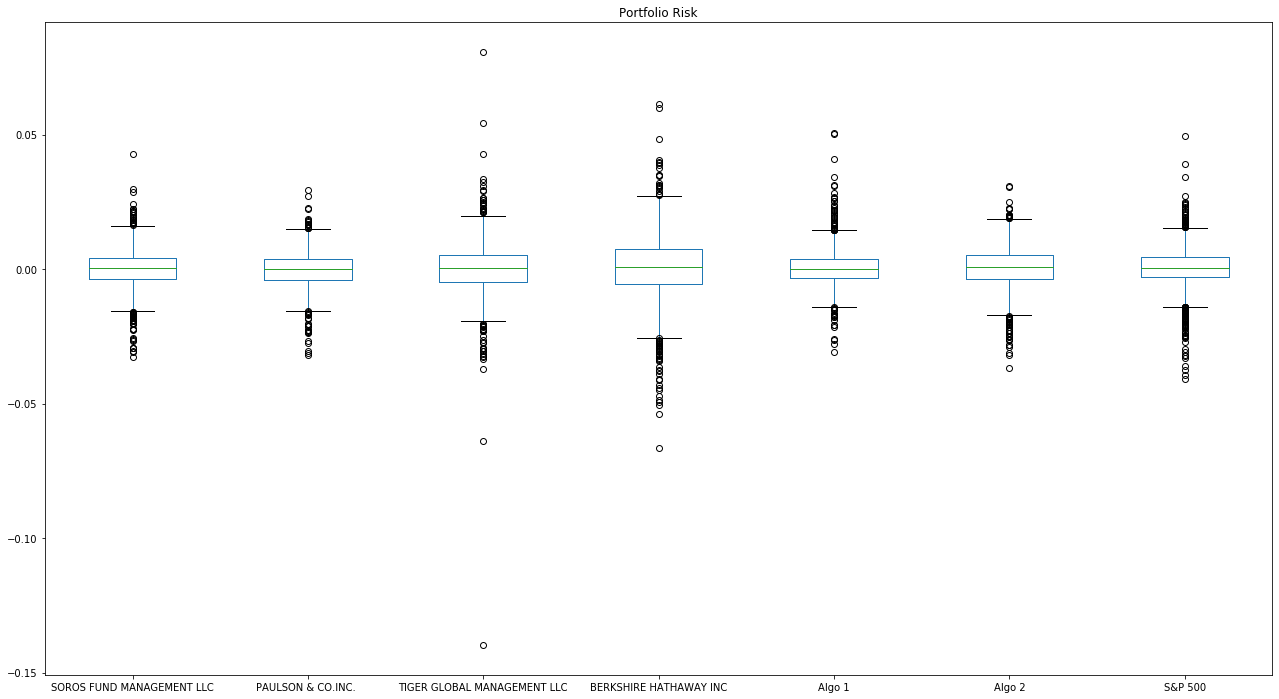

In [2113]:
# Box plot of risk
all_returns.plot(kind = 'box', figsize = (22,12), title = 'Portfolio Risk')

In [2114]:
# Annualized Standard Deviations
annualized_std = daily_std * np.sqrt(252)
annualized_std.head(10)

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

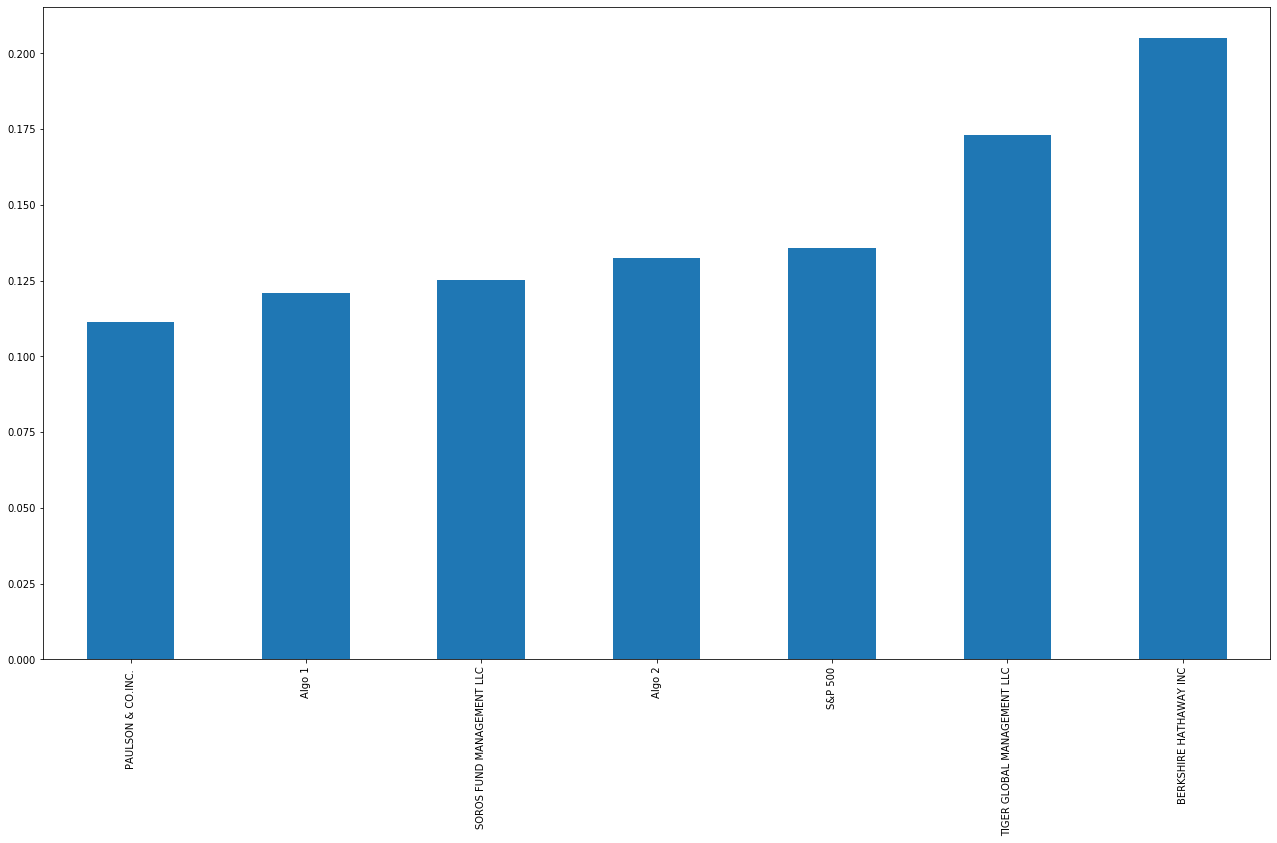

In [2115]:
# Bar Plot of annualized standard deviations
annualized_std.plot(kind = 'bar', figsize = (22,12))

## Rolling Statistics
--------------------------
Rolling statistics for Risk and Beta

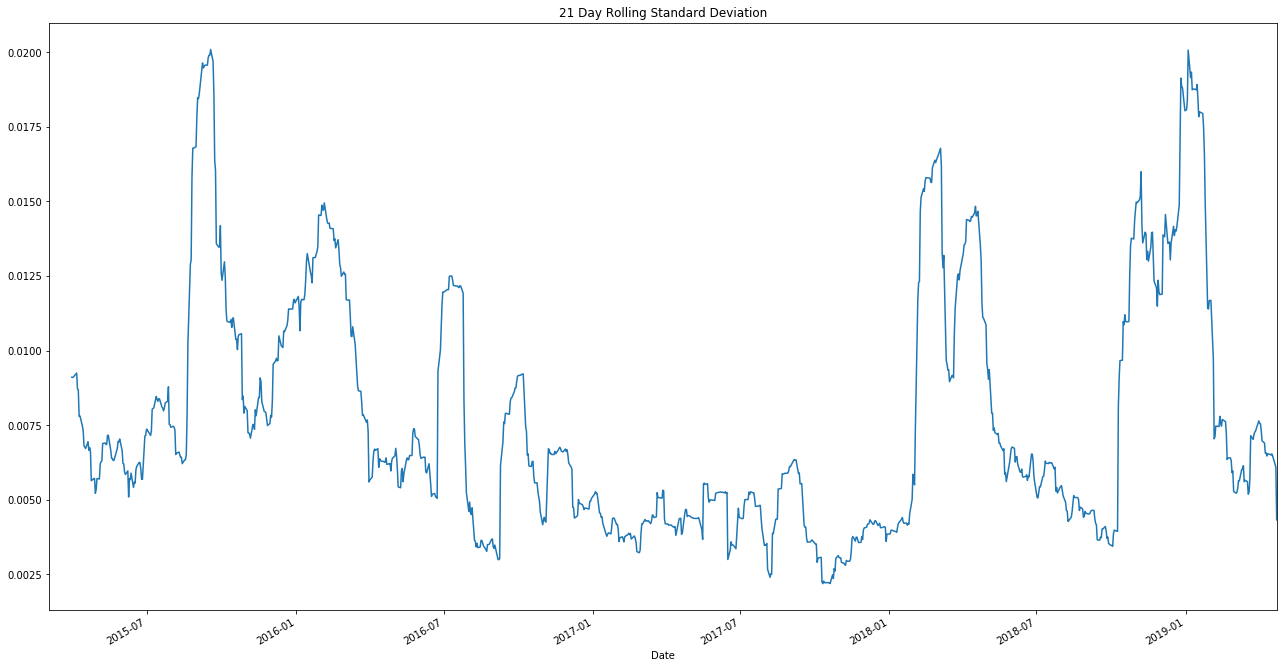

In [2116]:
# 21 day rolling standard deviation for the S&P 500
all_returns['S&P 500'].rolling(window = 21).std().plot(title = '21 Day Rolling Standard Deviation', figsize= (22,12))

In [2117]:
# Correlation between portfolios and the S&P 500
correlation = all_returns.corr()
correlation.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


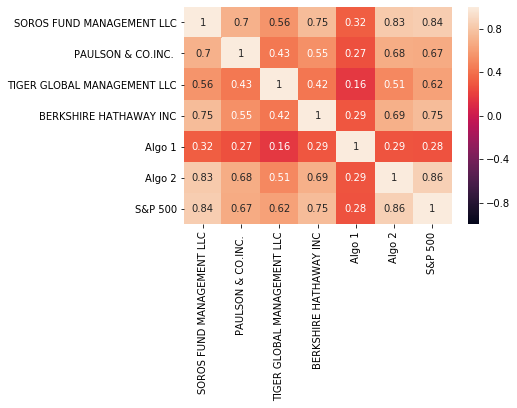

In [2118]:
# Heatmap of correlation
sns.heatmap(correlation, vmin = -1, vmax = 1, annot = True)

In [2119]:
# Calculate rolling covariance for beta
rolling_covariance = all_returns['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(all_returns['S&P 500'])


In [2120]:
# Calculate rolling variance for beta
rolling_variance = all_returns['S&P 500'].rolling(window = 60).var()


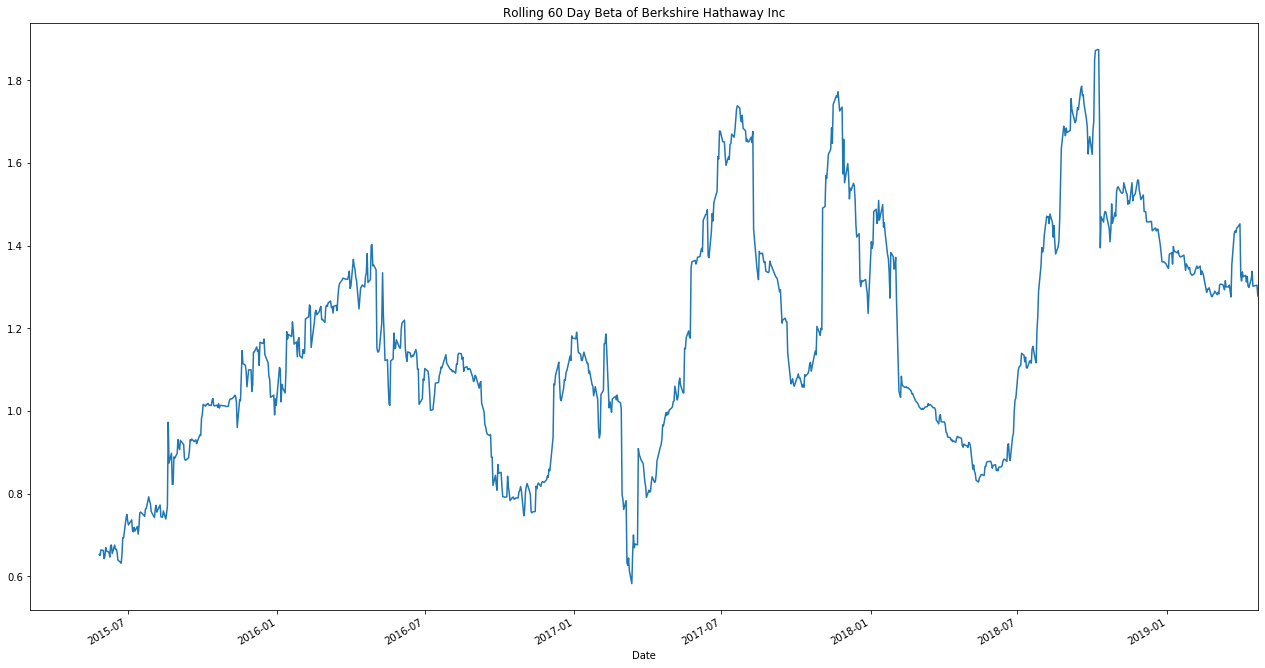

In [2121]:
# Calculate rolling 60 day beta for Berkshire Hathaway in comparision to the S&P 500
rolling_berkshire_beta = rolling_covariance / rolling_variance
rolling_berkshire_beta.plot(figsize =(22,12), title = 'Rolling 60 Day Beta of Berkshire Hathaway Inc')

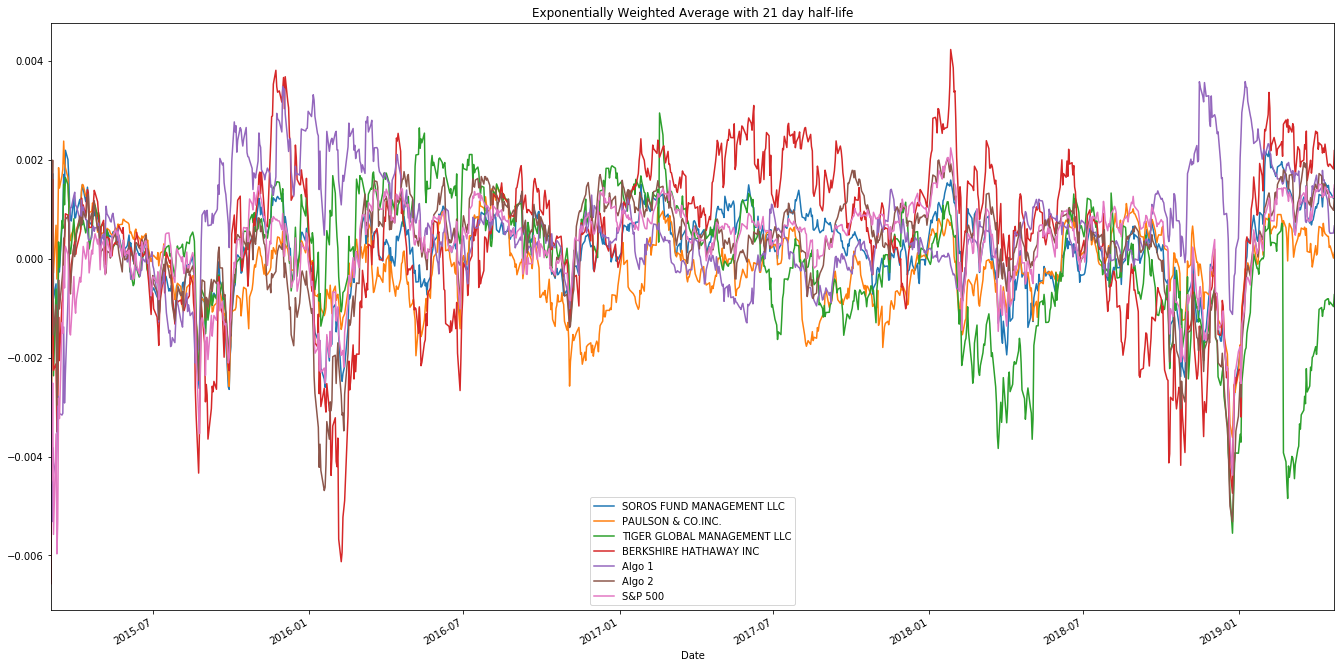

In [2122]:
# Calculate exponentially weighted moving average of all portfolio's daily returns with a 21 day half life
all_returns.ewm(halflife = 21).mean().plot(figsize = (23,12), title= 'Exponentially Weighted Average with 21 day half-life')

## Sharpe Ratios
-----------------------------------
Calculate annualized Sharpe ratios to determine which portfolio has the best performance

In [2123]:
# Calculate annualized Sharpe ratios
sharpe_ratios = (all_returns.mean() * 252) / annualized_std
sharpe_ratios.head(10)


Algo 1                         1.378648
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
PAULSON & CO.INC.             -0.483570
S&P 500                        0.648267
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
dtype: float64

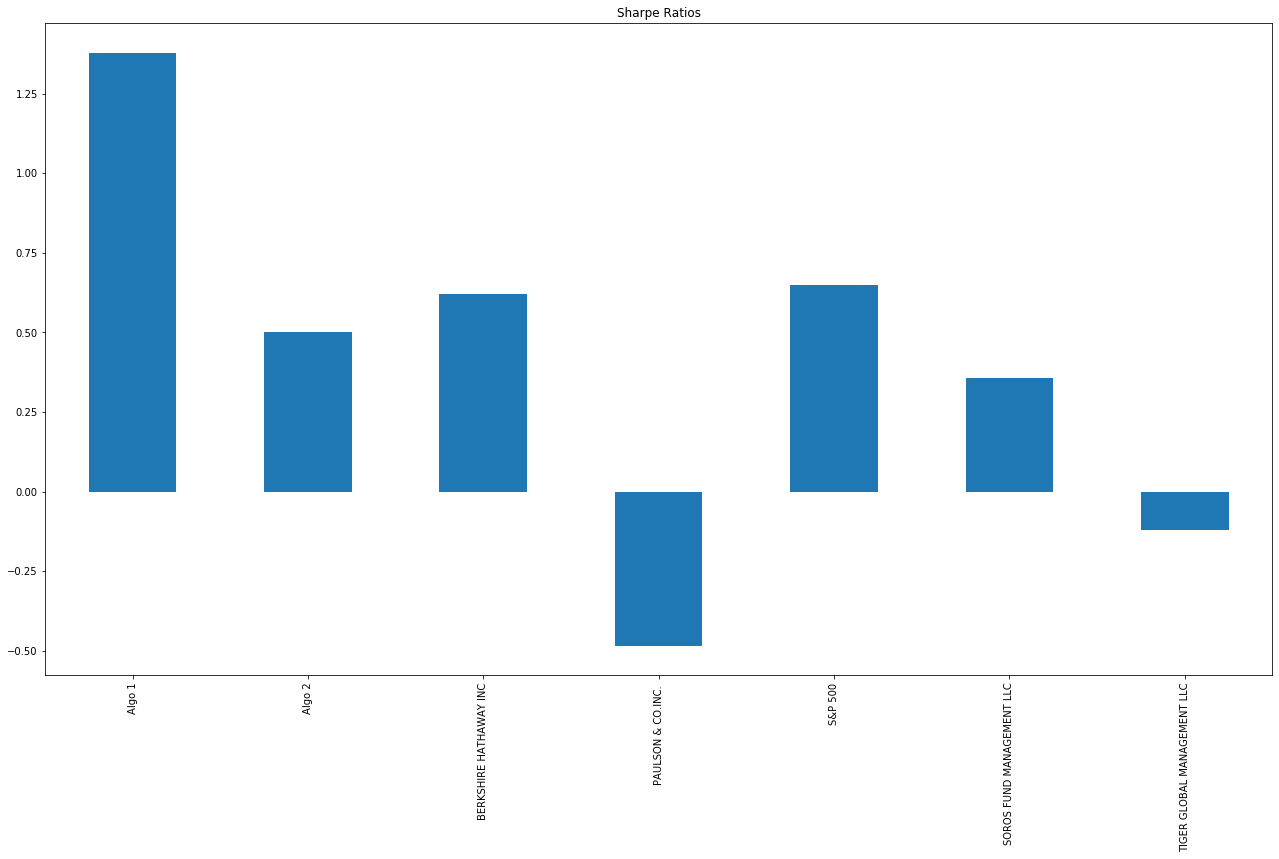

In [2124]:
# Plot Sharpe ratios
sharpe_ratios.plot(kind = 'bar', figsize = (22,12), title = 'Sharpe Ratios')

# Custom Portfolio Returns
---------------------------------
I have chosen 5 stocks and will compare their performance to the results of the other portfolios.  

## Read files into DataFrame and clean data
-----------------------------------------------

In [2125]:
# Set filepaths
dominos_filepath = Path('../python_pandas_homework/historical_quotes_custom_portfolio/dominos_historical_data.csv')
jpm_filepath = Path('../python_pandas_homework/historical_quotes_custom_portfolio/jpm_historical_data.csv')
marvel_filepath = Path('../python_pandas_homework/historical_quotes_custom_portfolio/marvel_historical_data.csv')
nike_filepath = Path('../python_pandas_homework/historical_quotes_custom_portfolio/nike_historical_data.csv')
sarepta_therapeutics_filepath = Path('../python_pandas_homework/historical_quotes_custom_portfolio/sarepta_therapeutics_historical_data.csv')



In [2126]:
# Read dominos  csv file 
dominos_csv = pd.read_csv(dominos_filepath, index_col = 'date', parse_dates = True, infer_datetime_format = True)
# Drop unnecessary columns
dominos_csv = dominos_csv.drop(columns =['volume','open','high','low'])
dominos_csv.head()

,close
date,
2019-08-15 12:42:00,236.60
2019-08-13 00:00:00,240.60
2019-08-12 00:00:00,240.01
2019-08-09 00:00:00,247.83
2019-08-08 00:00:00,246.75


In [2127]:
# Read JPMorgan csv file and drop unnecessary columns
jpm_csv = pd.read_csv(jpm_filepath, index_col = 'date', parse_dates = True, infer_datetime_format = True)
jpm_csv = jpm_csv.drop(columns =['volume','open','high','low'])
jpm_csv.head()


,close
date,
2019-08-15 12:34:00,105.075
2019-08-13 00:00:00,109.340
2019-08-12 00:00:00,107.680
2019-08-09 00:00:00,109.740
2019-08-08 00:00:00,109.860


In [2128]:
# Read Marvel csv file and drop columns
marvel_csv = pd.read_csv(marvel_filepath, index_col = 'date', parse_dates = True, infer_datetime_format = True)
marvel_csv = marvel_csv.drop(columns =['volume','open','high','low'])
marvel_csv.head()


,close
date,
2019-08-15 12:51:00,24.435
2019-08-13 00:00:00,25.140
2019-08-12 00:00:00,23.920
2019-08-09 00:00:00,24.720
2019-08-08 00:00:00,25.360


In [2129]:
# Read Nike csv file and drop columns
nike_csv = pd.read_csv(nike_filepath, index_col = 'date', parse_dates = True, infer_datetime_format = True)
nike_csv = nike_csv.drop(columns =['volume','open','high','low'])
nike_csv.head()

,close
date,
2019-08-15 12:40:00,81.52
2019-08-13 00:00:00,83.32
2019-08-12 00:00:00,81.65
2019-08-09 00:00:00,81.98
2019-08-08 00:00:00,83.00


In [2130]:
# Read Sarepta Therapeutics and drop columns
sarepta_therapeutics_csv = pd.read_csv(sarepta_therapeutics_filepath, index_col = 'date', parse_dates = True, infer_datetime_format = True)
sarepta_therapeutics_csv = sarepta_therapeutics_csv.drop(columns =['volume','open','high','low'])
sarepta_therapeutics_csv.head()

,close
date,
2019-08-15 12:49:00,123.59
2019-08-13 00:00:00,126.15
2019-08-12 00:00:00,124.14
2019-08-09 00:00:00,126.11
2019-08-08 00:00:00,132.98


In [2131]:
# Join the individual stock DataFrames into one DataFrame
combined_df = pd.concat([dominos_csv,jpm_csv,marvel_csv,nike_csv,sarepta_therapeutics_csv], axis = 1, join = 'inner')
combined_df.columns = ['DPZ', 'JPM', 'MRVL','NKE','SRPT']
combined_df.head()

,DPZ,JPM,MRVL,NKE,SRPT
date,,,,,
2019-08-13,240.60,109.34,25.14,83.32,126.15
2019-08-12,240.01,107.68,23.92,81.65,124.14
2019-08-09,247.83,109.74,24.72,81.98,126.11
2019-08-08,246.75,109.86,25.36,83.00,132.98
2019-08-07,245.74,108.03,24.70,81.28,142.26


In [2132]:
# Inspect tail of data
combined_df.tail()

,DPZ,JPM,MRVL,NKE,SRPT
date,,,,,
2014-08-19,75.15,57.56,13.49,39.255,22.36
2014-08-18,75.04,57.23,13.43,39.275,22.35
2014-08-15,74.55,56.75,13.33,38.565,22.47
2014-08-14,74.75,56.98,13.33,38.650,22.36
2014-08-13,74.49,56.72,13.26,38.625,22.35


In [2133]:
# Check for nulls
combined_df.isnull().sum()

DPZ     0
JPM     0
MRVL    0
NKE     0
SRPT    0
dtype: int64

In [2134]:
#Check for duplicate dates
combined_df.index.duplicated().sum()

0

In [2135]:
# Calculate daily returns
all_returns_custom = combined_df.pct_change()
all_returns_custom.head()

,DPZ,JPM,MRVL,NKE,SRPT
date,,,,,
2019-08-13,NaN,NaN,NaN,NaN,NaN
2019-08-12,-0.002452,-0.015182,-0.048528,-0.020043,-0.015933
2019-08-09,0.032582,0.019131,0.033445,0.004042,0.015869
2019-08-08,-0.004358,0.001093,0.025890,0.012442,0.054476
2019-08-07,-0.004093,-0.016658,-0.026025,-0.020723,0.069785


In [2136]:
# Drop nulls
all_returns_custom = all_returns_custom.dropna()
all_returns_custom.head()

,DPZ,JPM,MRVL,NKE,SRPT
date,,,,,
2019-08-12,-0.002452,-0.015182,-0.048528,-0.020043,-0.015933
2019-08-09,0.032582,0.019131,0.033445,0.004042,0.015869
2019-08-08,-0.004358,0.001093,0.025890,0.012442,0.054476
2019-08-07,-0.004093,-0.016658,-0.026025,-0.020723,0.069785
2019-08-06,-0.013144,0.022216,-0.017409,0.000246,0.008787


## Calculate the weighted returns for the custom portfolio assuming an equal number of shares for each stock
-------------------------------------------------------------------------------------------------------------


In [2137]:
# Sort index
all_returns_custom = all_returns_custom.sort_index()
all_returns_custom.head()

,DPZ,JPM,MRVL,NKE,SRPT
date,,,,,
2014-08-13,-0.003478,-0.004563,-0.005251,-0.000647,-0.000447
2014-08-14,0.002683,0.004053,0.000000,0.002204,-0.004895
2014-08-15,-0.006530,-0.008387,-0.007446,-0.018078,0.005369
2014-08-18,-0.001464,-0.005733,-0.004448,0.000509,-0.000447
2014-08-19,0.006563,-0.001388,-0.003693,-0.005069,0.029466


In [2138]:
# Apply weights and calculate returns
weights = [0.20,0.20,0.20,0.20,0.20]
all_returns_custom = all_returns_custom.dot(weights)
all_returns_custom.head()

date
2014-08-13   -0.002877
2014-08-14    0.000809
2014-08-15   -0.007014
2014-08-18   -0.002316
2014-08-19    0.005176
dtype: float64

## Join custom portfolio to the Dataframe that contains all the portfolio returns
----------------------------------------------------------------------------------

In [2139]:
# Concat portfolios
all_returns_joined = pd.concat([all_returns,all_returns_custom], axis = 1, join = 'inner')
all_returns_joined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.013012
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.005602
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.017821
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.002702
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.014459


In [2140]:
# Check head of data
all_returns_joined = all_returns_joined.rename(columns = {0:"Custom_Portfolio"})
all_returns_joined.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom_Portfolio
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.013012
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.005602
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.017821
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.002702
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.014459


In [2141]:
# Check tail of data
all_returns_joined.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom_Portfolio
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.017266
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.002408
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.010266
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,-0.013027
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,-0.014033


## Performance and risk analysis of custom portfolio in comparision to the others
-----------------------------------------------------------------------------------

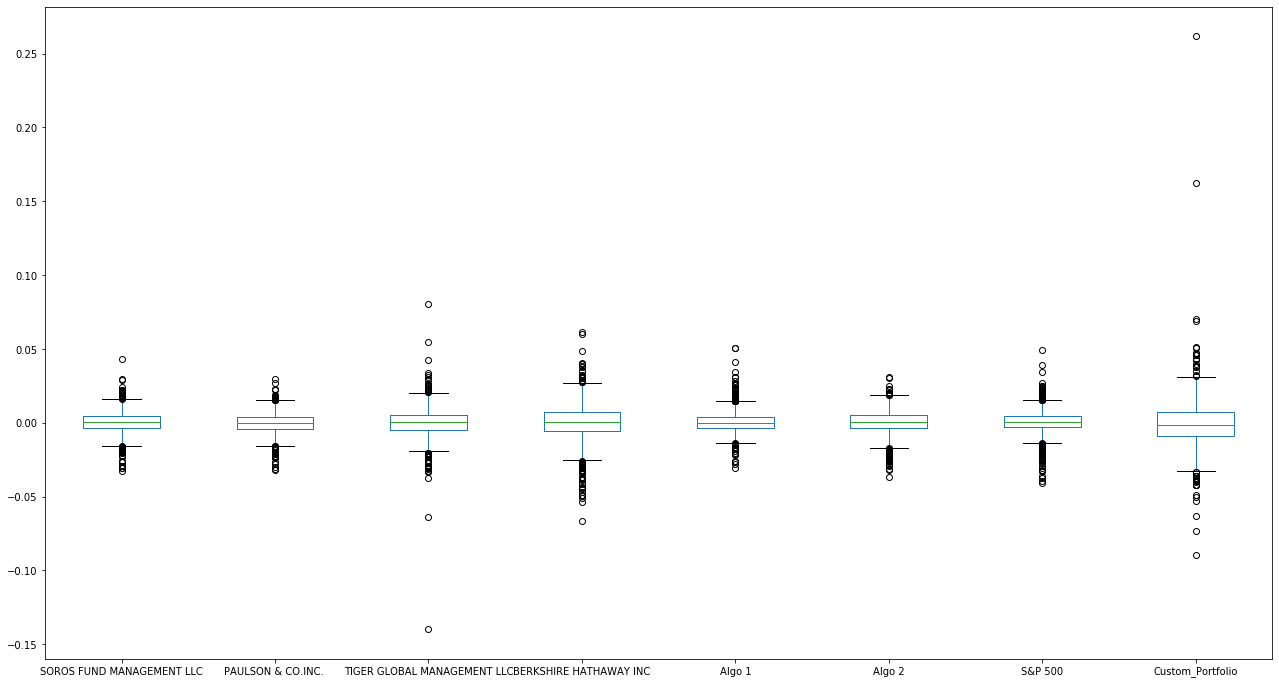

In [2142]:
# Box plot of all portfolios daily returns
all_returns_joined.plot(kind = 'box', figsize = (22,12))

In [2143]:
# Daily standard deviations
all_returns_joined_daily_std = all_returns_joined.std()
all_returns_joined_daily_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
Custom_Portfolio               0.017433
dtype: float64

In [2144]:
# Annual Standard deviations
all_returns_joined_annualized_std = all_returns_joined_daily_std * np.sqrt(252)
all_returns_joined_annualized_std.head(10)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
Custom_Portfolio               0.276747
dtype: float64

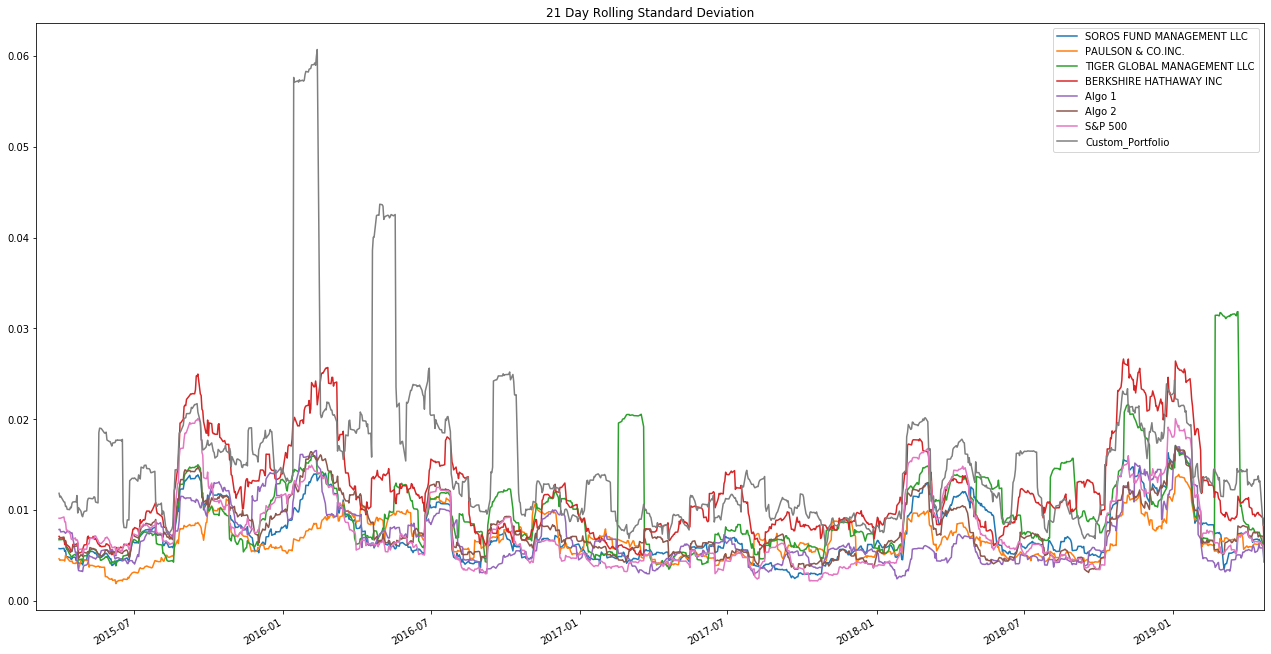

In [2145]:
# Plot of rolling 21 day standard deviations
all_returns_joined.rolling(window = 21).std().plot(title = '21 Day Rolling Standard Deviation', figsize= (22,12))

In [2146]:
# Calculate custom portfolo's covariance to calculate beta 
custom_covariance = all_returns_joined['Custom_Portfolio'].cov(all_returns_joined['S&P 500'])
print(custom_covariance)

4.260528654987247e-06


In [2147]:
# Calculate variance for S&P 500
custom_variance = all_returns_joined['S&P 500'].var()
print(custom_variance)

7.316632424648712e-05


In [2148]:
# Beta of custom porfolio in comparision to the S&P 500
custom_beta = custom_covariance / custom_variance
print(custom_beta)

0.05823073249701763


In [2149]:
# Sharpe ratios for all portfolios 
custom_sharpe_ratios = (all_returns_joined.mean() * 252) / all_returns_joined_annualized_std
print(custom_sharpe_ratios)


SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
Custom_Portfolio              -0.407773
dtype: float64


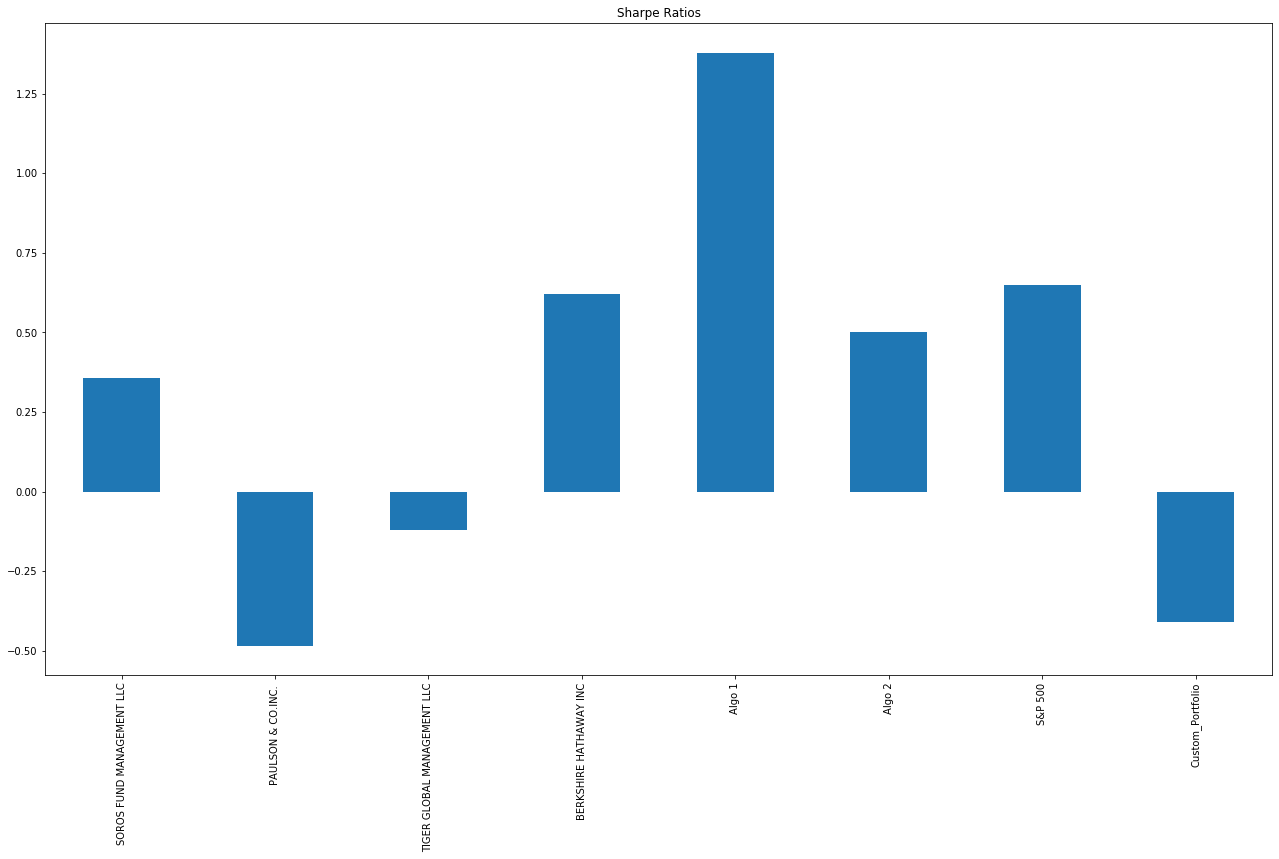

In [2150]:
# Bar plot of Sharpe ratios
custom_sharpe_ratios.plot(kind ='bar' , figsize = (22,12), title ='Sharpe Ratios')

In [2151]:
# Calculate correlation
correlation_custom = all_returns_joined.corr()
correlation_custom.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom_Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.012309
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.021571
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.000325
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,-0.023196
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,0.006591


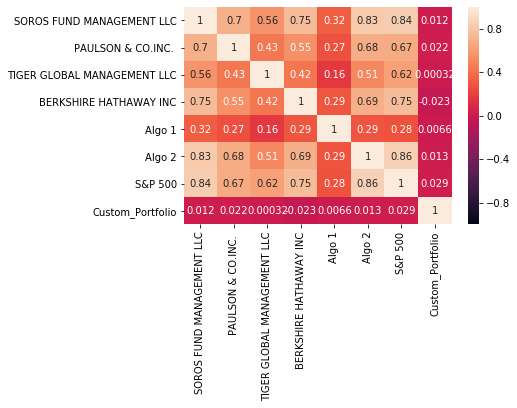

In [2152]:
# Heatmap of correlation
sns.heatmap(correlation_custom, vmin = -1, vmax = 1, annot = True)